In [1]:
%pylab notebook
import read_mist_models

Populating the interactive namespace from numpy and matplotlib


In [32]:
#iso = read_mist_models.ISO('MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_basic.iso') #Initial Composition
iso = read_mist_models.ISO('MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_basic.iso') #If Stars below Isochrones
#iso = read_mist_models.ISO('MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.4_basic.iso') #If Stars above Isochrones

Reading in: MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_basic.iso


In [33]:
APOGEE_ID = '2M19344461+4514189'
mA = 1.1158868228 ;emA = 0.0091185779
mB = 1.1051407461 ;emB = 0.0085983398
rA = 1.4054470422 ;erA = 0.0492338153
rB = 0.9347193872 ;erB = 0.0860350993

In [42]:
#age in gigayears
iniage = 1
finage = 10

In [43]:
bound1 = 9+np.log10(iniage)
bound2 = 9+np.log10(finage)
print(bound1,bound2)

9.0 10.0


In [44]:
ics = {}
for agei in np.linspace(bound1,bound2,5):
    ageind = iso.age_index(agei)
    mM = iso.isos[ageind]['star_mass']
    rM = 10**iso.isos[ageind]['log_R']
    phase = iso.isos[ageind]['phase']
    index = phase<3
    mMi = mM[index];rMi = rM[index]
    d = {}
    d['mass'] = mMi
    d['radius'] = rMi
    ics[agei] = d

<IPython.core.display.Javascript object>


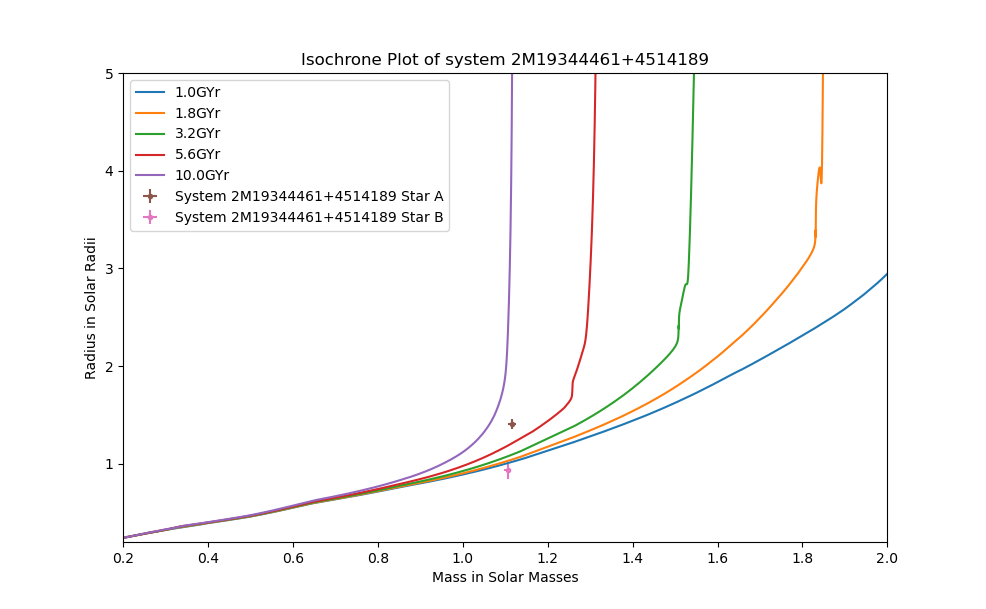

In [45]:
for age in ics:
    plt.plot(ics[age]['mass'],ics[age]['radius'],label=f'{10**(age-9):.1f}GYr')
plt.errorbar(mA,rA,xerr=emA,yerr=erA,fmt='.',label=f'System {APOGEE_ID} Star A')
plt.errorbar(mB,rB,xerr=emB,yerr=erB,fmt='.',label=f'System {APOGEE_ID} Star B')
plt.xlabel('Mass in Solar Masses')
plt.ylabel('Radius in Solar Radii')
plt.xlim(0.2,2)
plt.ylim(0.2,5)
plt.legend()
plt.title(f'Isochrone Plot of system {APOGEE_ID}')
plt.savefig(f'Isochrone plot of {APOGEE_ID} 1.png')